# Data Quality Impact: Bad Data Leads to Bad Recommendations

This notebook demonstrates how **data quality directly affects parameter quality**, which affects recommendation quality.

Understanding this is essential because:
- Bad data produces bad parameters
- Bad parameters produce bad recommendations
- You cannot have good recommendations from bad data
- Assessing data quality helps identify parameter risk


## Key Concepts

**Data Quality** affects everything:
- Accurate data → Accurate parameters → Good recommendations
- Inaccurate data → Inaccurate parameters → Bad recommendations
- Incomplete data → Unreliable parameters → Risky recommendations

**Data Quality Dimensions**:
- **Accuracy**: Are values correct?
- **Completeness**: Is all data present?
- **Representativeness**: Does data represent the situation?
- **Consistency**: Are methods and definitions consistent?

**The Chain**:
- Data Quality → Parameter Quality → Recommendation Quality
- You cannot fix bad recommendations with better optimization if data is still bad

**Critical insight**: Assess data quality before using it for parameters. Bad data leads to bad recommendations.


## Scenario: Sales Data for Demand Parameter

You need to estimate demand for a product. You have sales data from the past year.

**Good data**: Complete, accurate records from point-of-sale system
**Bad data**: Incomplete records, some missing, some inaccurate

**Question**: How does data quality affect the demand parameter and model recommendation?


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Good Data vs Bad Data

Let's compare good quality data with bad quality data:


DATA QUALITY COMPARISON:

True average (unknown): 102.9 units/month
Good data average: 102.9 units/month (error: 0.0)
Bad data average: 109.0 units/month (error: 6.1)

⚠️  Bad data produces worse parameter estimate!


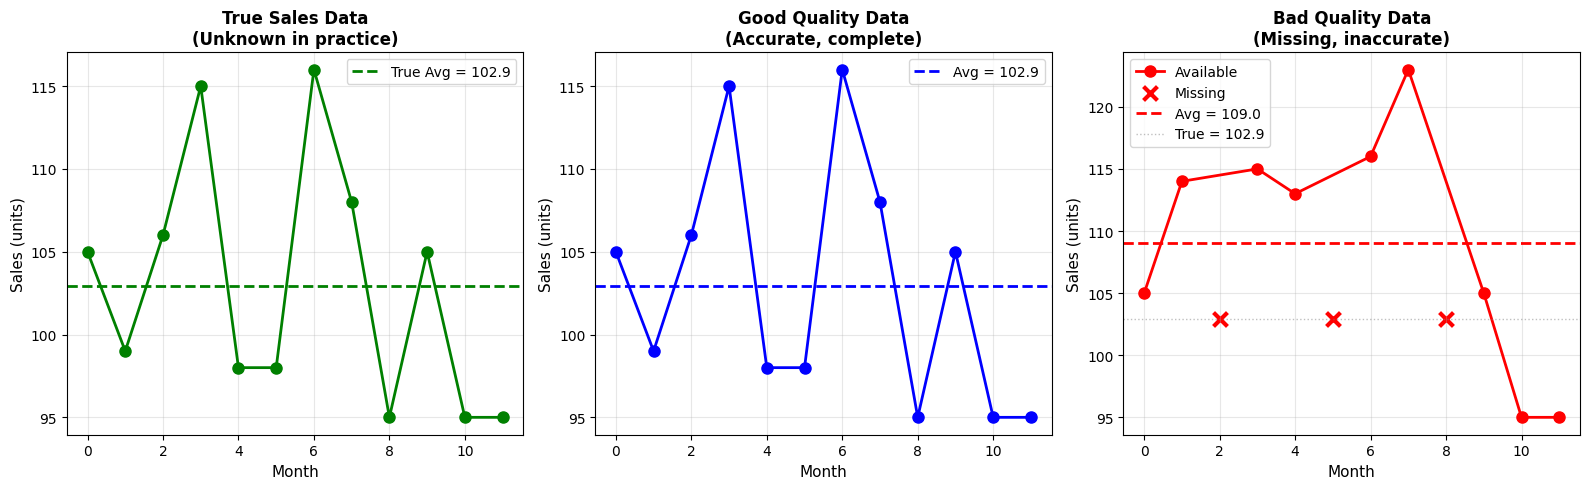

In [2]:
# True sales (unknown in practice, but we'll use for comparison)
np.random.seed(42)
true_sales = np.random.normal(100, 10, 12)  # Mean 100, std 10
true_sales = np.maximum(true_sales, 80)  # Floor at 80
true_sales = np.round(true_sales).astype(int)

# Good data: Accurate and complete
good_data = true_sales.copy()

# Bad data: Some missing, some inaccurate
bad_data = true_sales.copy().astype(float)  # Convert to float to allow NaN
# Make some missing (set to NaN)
missing_indices = [2, 5, 8]
bad_data[missing_indices] = np.nan
# Make some inaccurate (add errors)
error_indices = [1, 4, 7]
bad_data[error_indices] = bad_data[error_indices] + np.random.choice([-15, 15], size=len(error_indices))

# Calculate parameters from each dataset
true_avg = np.mean(true_sales)
good_avg = np.mean(good_data)
bad_avg = np.nanmean(bad_data)  # Handle NaN

print("DATA QUALITY COMPARISON:\n")
print(f"True average (unknown): {true_avg:.1f} units/month")
print(f"Good data average: {good_avg:.1f} units/month (error: {abs(good_avg-true_avg):.1f})")
print(f"Bad data average: {bad_avg:.1f} units/month (error: {abs(bad_avg-true_avg):.1f})")
print(f"\n⚠️  Bad data produces worse parameter estimate!")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: True data
ax1 = axes[0]
ax1.plot(range(12), true_sales, 'o-', color='green', linewidth=2, markersize=8)
ax1.axhline(y=true_avg, color='green', linestyle='--', linewidth=2, label=f'True Avg = {true_avg:.1f}')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Sales (units)', fontsize=11)
ax1.set_title('True Sales Data\n(Unknown in practice)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Good data
ax2 = axes[1]
ax2.plot(range(12), good_data, 'o-', color='blue', linewidth=2, markersize=8)
ax2.axhline(y=good_avg, color='blue', linestyle='--', linewidth=2, label=f'Avg = {good_avg:.1f}')
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('Sales (units)', fontsize=11)
ax2.set_title('Good Quality Data\n(Accurate, complete)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 3: Bad data
ax3 = axes[2]
# Plot available data
available_mask = ~np.isnan(bad_data)
ax3.plot(np.where(available_mask)[0], bad_data[available_mask], 'o-', 
         color='red', linewidth=2, markersize=8, label='Available')
# Mark missing
missing_mask = np.isnan(bad_data)
if np.any(missing_mask):
    ax3.scatter(np.where(missing_mask)[0], [true_avg]*np.sum(missing_mask), 
               marker='x', color='red', s=100, linewidth=3, label='Missing')
ax3.axhline(y=bad_avg, color='red', linestyle='--', linewidth=2, label=f'Avg = {bad_avg:.1f}')
ax3.axhline(y=true_avg, color='gray', linestyle=':', linewidth=1, alpha=0.5, label=f'True = {true_avg:.1f}')
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Sales (units)', fontsize=11)
ax3.set_title('Bad Quality Data\n(Missing, inaccurate)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Step 3: Parameters from Good vs Bad Data

Let's see how data quality affects parameters:


PARAMETERS AND RECOMMENDATIONS:

True demand (unknown): 102.9 units/month

Using GOOD data:
  Parameter: 102.9 units/month
  Recommendation: Order 124 units
  Error: 0 units (0.0%)

Using BAD data:
  Parameter: 109.0 units/month
  Recommendation: Order 131 units
  Error: 7 units (5.9%)


KEY INSIGHT:
  Bad data → Bad parameter → Bad recommendation
  Good data → Good parameter → Good recommendation


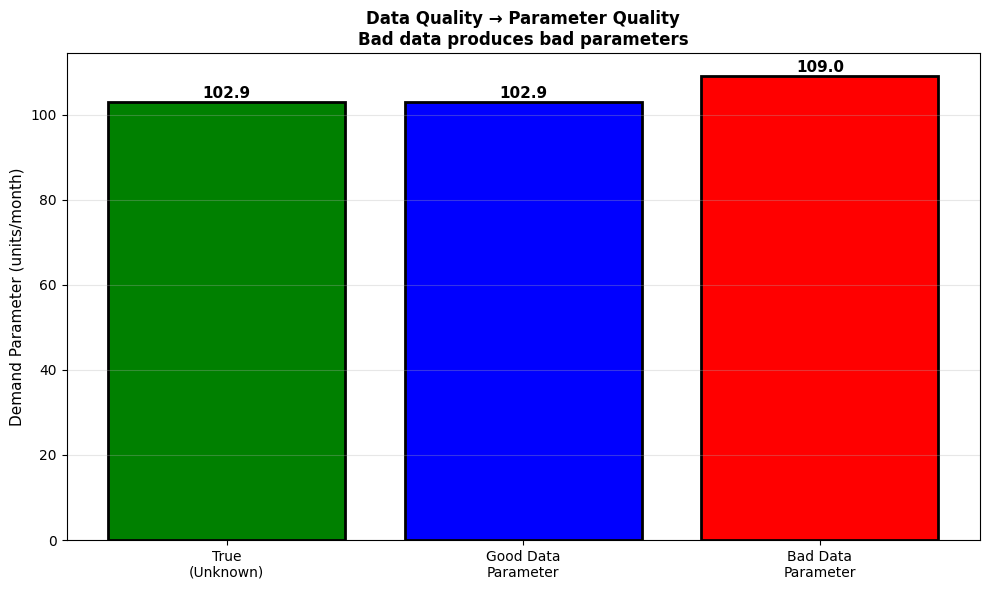

In [3]:
# Model uses average as demand parameter
safety_stock_pct = 0.20

# Recommendations using different data quality
order_good = good_avg * (1 + safety_stock_pct)
order_bad = bad_avg * (1 + safety_stock_pct)
order_true = true_avg * (1 + safety_stock_pct)  # What we should order

print("PARAMETERS AND RECOMMENDATIONS:\n")
print(f"True demand (unknown): {true_avg:.1f} units/month")
print(f"\nUsing GOOD data:")
print(f"  Parameter: {good_avg:.1f} units/month")
print(f"  Recommendation: Order {order_good:.0f} units")
print(f"  Error: {abs(order_good - order_true):.0f} units ({abs(order_good - order_true)/order_true*100:.1f}%)")

print(f"\nUsing BAD data:")
print(f"  Parameter: {bad_avg:.1f} units/month")
print(f"  Recommendation: Order {order_bad:.0f} units")
print(f"  Error: {abs(order_bad - order_true):.0f} units ({abs(order_bad - order_true)/order_true*100:.1f}%)")

print(f"\n\nKEY INSIGHT:")
print(f"  Bad data → Bad parameter → Bad recommendation")
print(f"  Good data → Good parameter → Good recommendation")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
scenarios = ['True\n(Unknown)', 'Good Data\nParameter', 'Bad Data\nParameter']
values = [true_avg, good_avg, bad_avg]
colors = ['green', 'blue', 'red']

bars = ax.bar(scenarios, values, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('Demand Parameter (units/month)', fontsize=11)
ax.set_title('Data Quality → Parameter Quality\nBad data produces bad parameters', 
             fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{val:.1f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


## Step 4: Recommendations from Good vs Bad Data

Let's see how this affects final recommendations:


RECOMMENDATIONS FROM DIFFERENT DATA QUALITY:

Data Quality  Parameter  Recommendation  Actual Need  Error           Result
        Good 102.916667           123.5        123.5    0.0 Close to optimal
         Bad 109.000000           130.8        123.5    7.3 Far from optimal


KEY INSIGHT:
  Data Quality → Parameter Quality → Recommendation Quality
  You cannot have good recommendations from bad data!


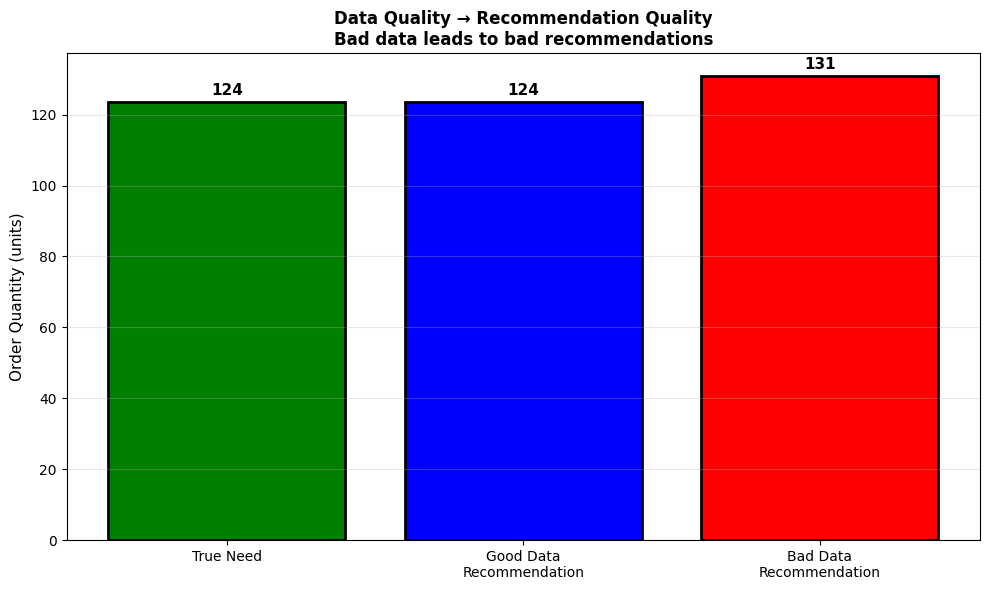

In [4]:
# What happens in reality?
actual_demand = true_avg  # What actually happens

# Compare recommendations
comparison = pd.DataFrame({
    'Data Quality': ['Good', 'Bad'],
    'Parameter': [good_avg, bad_avg],
    'Recommendation': [order_good, order_bad],
    'Actual Need': [order_true, order_true],
    'Error': [abs(order_good - order_true), abs(order_bad - order_true)],
    'Result': ['Close to optimal', 'Far from optimal']
})

print("RECOMMENDATIONS FROM DIFFERENT DATA QUALITY:\n")
print(comparison.to_string(index=False))

print("\n\nKEY INSIGHT:")
print("  Data Quality → Parameter Quality → Recommendation Quality")
print("  You cannot have good recommendations from bad data!")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
scenarios = ['True Need', 'Good Data\nRecommendation', 'Bad Data\nRecommendation']
orders = [order_true, order_good, order_bad]
colors = ['green', 'blue', 'red']

bars = ax.bar(scenarios, orders, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('Order Quantity (units)', fontsize=11)
ax.set_title('Data Quality → Recommendation Quality\nBad data leads to bad recommendations', 
             fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for bar, order in zip(bars, orders):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{order:.0f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


## Summary: Data Quality Impact

**Key Takeaways:**

1. **Data quality affects parameter quality**
   - Accurate data → Accurate parameters
   - Inaccurate data → Inaccurate parameters
   - Incomplete data → Unreliable parameters

2. **Parameter quality affects recommendation quality**
   - Good parameters → Good recommendations
   - Bad parameters → Bad recommendations
   - You cannot fix bad recommendations with better optimization if data is bad

3. **The chain: Data → Parameter → Recommendation**
   - Data Quality → Parameter Quality → Recommendation Quality
   - Bad data leads to bad recommendations, regardless of optimization quality

4. **Practical implications**
   - Assess data quality before using it
   - Check accuracy, completeness, representativeness, consistency
   - Fix data quality issues before building models
   - You cannot have good recommendations from bad data

**Remember**: Data quality is the foundation. Bad data leads to bad parameters, which lead to bad recommendations!
